In [1]:
import pyreadr

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Discovery

### Load Datasets

In [5]:
datset_name = "main"
cutoff = 0.8

# load discovery results
experiment_name = f"discovery_{datset_name}_cutoff_{cutoff}"
discovery = pyreadr.read_r(f'results/{experiment_name}.rdata')["discovery"]
discovery.replace("NaN","0", inplace=True)
discovery.iloc[:,1:] = discovery.iloc[:,1:].astype(float)
def dr_f1_score(row):
    recall = row['dr_Recall']
    precision = row['dr_Precision']
    if (precision + recall)>0:
        return 2 * (precision * recall) / (precision + recall)
    else:
        return 0
def em_f1_score(row):
    recall = row['em_Recall']
    precision = row['em_Precision']
    if (precision + recall)>0:
        return 2 * (precision * recall) / (precision + recall)
    else:
        return 0
discovery["dr_f1score"] = discovery.apply(dr_f1_score, axis=1)
discovery["em_f1score"] = discovery.apply(em_f1_score, axis=1)
discovery.method = discovery.method.apply(lambda x: x.replace("learner", "-learner"))
discovery.method = discovery.method.apply(lambda x: x.replace('bart', 'cbart'))


# filtering
xmax = 5
#methods = ["CRE (cf)"]#, "CRE (cf)"]#, "CRE (bcf)", "HCT"]
#discovery = discovery[(discovery.method.isin(methods)) & (discovery.effect_size<=xmax)]
discovery[discovery.method == "CRE (t-learner)"]#.head(20)

,method,effect_size,seed,dr_IoU,dr_Precision,dr_Recall,em_IoU,em_Precision,em_Recall,dr_f1score,em_f1score
30,CRE (t-learner),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,CRE (t-learner),0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,CRE (t-learner),0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,CRE (t-learner),0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,CRE (t-learner),0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
635,CRE (t-learner),5.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
636,CRE (t-learner),5.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
637,CRE (t-learner),5.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
638,CRE (t-learner),5.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


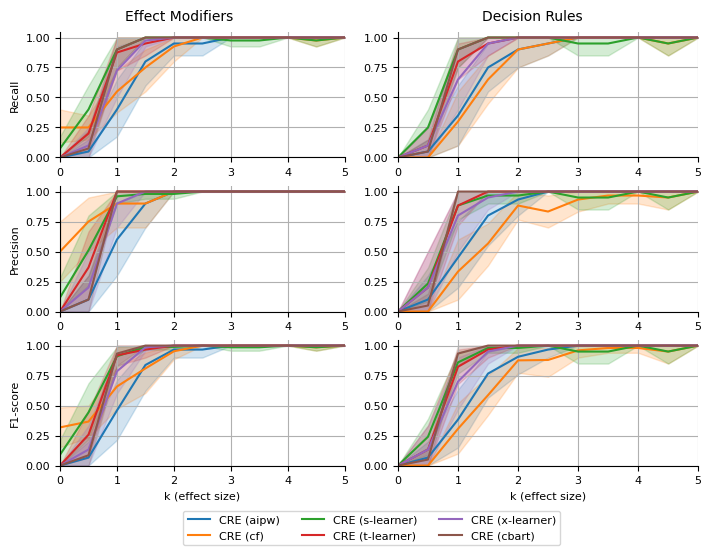

In [4]:
fig = plt.figure(constrained_layout=True, figsize=(7, 5))
#fig.suptitle('Discovery')
subfigs = fig.subfigures(nrows=1, ncols=2)
labelsize = 8

# Effect Modifiers
subfigs[0].suptitle(f'Effect Modifiers', size=10)
ax = subfigs[0].subplots(nrows=3, ncols=1)

sns.lineplot(data=discovery, x="effect_size", y="em_Recall", hue="method", ax=ax[0])
ax[0].set_xlabel('', size=labelsize) 
ax[0].set_ylabel('Recall', size=labelsize) 
ax[0].set_ylim((0,1.05))
ax[0].set_xlim((0,xmax))
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=labelsize)
ax[0].grid(True)
ax[0].get_legend().remove()  

sns.lineplot(data=discovery, x="effect_size", y="em_Precision", hue="method", ax=ax[1])
ax[1].set_xlabel('', size=labelsize)  
ax[1].set_ylabel('Precision', size=labelsize)  
ax[1].set_ylim((0,1.05))
ax[1].set_xlim((0,xmax))
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=labelsize)
ax[1].grid(True)
ax[1].get_legend().remove()

sns.lineplot(data=discovery, x="effect_size", y="em_f1score", hue="method", ax=ax[2])
ax[2].set_xlabel('k (effect size)', size=labelsize) 
ax[2].set_ylabel('F1-score', size=labelsize)  
ax[2].set_ylim((0,1.05))
ax[2].set_xlim((0,xmax))
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].tick_params(axis='both', which='major', labelsize=labelsize)
ax[2].grid(True)
ax[2].get_legend().remove()

# Causal Decision Rules
subfigs[1].suptitle(f'Decision Rules', size=10)
ax = subfigs[1].subplots(nrows=3, ncols=1)

sns.lineplot(data=discovery, x="effect_size", y="dr_Recall", hue="method", ax=ax[0])
ax[0].set_xlabel('', size=labelsize)  
ax[0].set_ylabel('', size=labelsize) 
ax[0].set_ylim((0,1.05)) 
ax[0].set_xlim((0,xmax))
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=labelsize)
ax[0].grid(True)
ax[0].get_legend().remove()

sns.lineplot(data=discovery, x="effect_size", y="dr_Precision", hue="method", ax=ax[1])
ax[1].set_xlabel('', size=labelsize)  
ax[1].set_ylabel('', size=labelsize) 
ax[1].set_ylim((0,1.05)) 
ax[1].set_xlim((0,xmax))
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=labelsize)
ax[1].grid(True)
ax[1].get_legend().remove()

sns.lineplot(data=discovery, x="effect_size", y="dr_f1score", hue="method", ax=ax[2])
ax[2].set_xlabel('k (effect size)', size=labelsize)  
ax[2].set_ylabel('', size=labelsize)  
ax[2].set_ylim((0,1.05))
ax[2].set_xlim((0,xmax))
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].tick_params(axis='both', which='major', labelsize=labelsize)
ax[2].grid(True)
ax[2].get_legend().remove()

handles, labels = ax[0].get_legend_handles_labels()
# order = [0,3,1,4,2,5,6]
# labels = [labels[i] for i in order]
# handles = [handles[i] for i in order]
fig.legend(handles, labels, loc='upper right', ncol=3, bbox_to_anchor=(0.8, 0), fontsize=labelsize);
plt.savefig(f'results/{experiment_name}.pdf', bbox_inches='tight') 

# Estimation

### Load Dataset

In [ ]:
datset_name = "nonlin_conf"
cutoff = 0.9
pfer = 0.5
n_rules = 2

# load estimation results
experiment_name = f"estimation_{datset_name}_cutoff_{cutoff}"
estimation = pyreadr.read_r(f'results/{experiment_name}.rdata')["estimation"]
estimation.iloc[:,1:] = estimation.iloc[:,1:].astype(float)
estimation.method = estimation.method.apply(lambda x: x.replace("slearner", "S-Learner"))
estimation.method = estimation.method.apply(lambda x: x.replace("tlearner", "T-Learner"))
estimation.method = estimation.method.apply(lambda x: x.replace("xlearner", "X-Learner"))
estimation.method = estimation.method.apply(lambda x: x.replace('bart', 'Causal BART'))
estimation.method = estimation.method.apply(lambda x: x.replace('bcf', 'BCF'))
estimation.method = estimation.method.apply(lambda x: x.replace('cf', 'CF'))
estimation.method = estimation.method.apply(lambda x: x.replace('aipw', 'AIPW'))

# standardize
estimation["beta1"] = (estimation["beta1"]+estimation["effect_size"])/estimation["effect_size"]
estimation["beta2"] = (estimation["beta2"]-estimation["effect_size"])/estimation["effect_size"]
if (n_rules==4):
    estimation["beta3"] = (estimation["beta3"]+2*estimation["effect_size"])/estimation["effect_size"]
    estimation["beta4"] = (estimation["beta4"]-2*estimation["effect_size"])/estimation["effect_size"]
else:
    estimation.drop(columns=['beta3', 'beta4'], axis=1, inplace=True)

# filtering
#methods = ['CRE (aipw)', 'CRE (bcf)', 'CRE (s-learner)','CRE (t-learner)', 'CRE (x-learner)', 'CRE (bart)', 'bcf']
#estimation = estimation[estimation.method.isin(methods)]
estimation

In [ ]:
estimation_summary = estimation.drop(columns=['effect_size', 'seed','cate_bias','ite_bias','beta1','beta2'], axis=1,)
estimation_summary = estimation_summary.groupby("method",sort=False).agg(["mean","std"])
estimation_summary = estimation_summary.round(4)
estimation_summary

In [ ]:
estimation_aate = estimation.drop(columns=['effect_size', 'seed','cate_bias','ite_bias','ite_rmse','ate_bias'], axis=1,)
estimation_aate = estimation_aate.groupby("method").agg(["mean","std"])
estimation_aate = estimation_aate.round(4)
estimation_aate

### ITE

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10, 4), layout='constrained')
#fig.suptitle('Estimation')
#sns.set(style="darkgrid")

sns.boxplot(data=estimation, x="ite_rmse", y="method", ax=ax[0])
ax[0].set_title("ITE")
ax[0].set_xlabel('RMSE')  
ax[0].set_ylabel('Method')
ax[0].set_xlim((0,4))

sns.boxplot(data=estimation, x="ite_bias", y="method", ax=ax[1])
ax[1].set_title("ATE")
ax[1].set_xlabel('Bias')  
ax[1].set_ylabel('')
ax[1].set_xlim((-4,4))
ax[1].set_yticks([])
ax[1].axvline(0, 0, 5, color="black", linestyle=":");  

plt.savefig(f'results/{experiment_name}_ITE.pdf', bbox_inches='tight') 

### CATE

In [ ]:
estimation_beta = estimation.dropna()
estimation_beta = estimation_beta[estimation_beta.method != "CRE (CF)"]
if (n_rules==2):
    fig, ax = plt.subplots(1,2,figsize=(8, 2.5), layout='constrained')
    #fig.suptitle('Estimation - β (AATE)')

    sns.boxplot(data=estimation_beta, x="beta1", y="method", ax=ax[0])
    ax[0].set_title('Rule 1')
    ax[0].set_xlabel('Bias')  
    ax[0].set_ylabel('Method')
    ax[0].set_xlim((-0.3,0.3))
    ax[0].axvline(0, 0, 5, color="black", linestyle=":"); 

    sns.boxplot(data=estimation_beta, x="beta2", y="method", ax=ax[1])
    ax[1].set_title('Rule 2')
    ax[1].set_xlabel('Bias')  
    ax[1].set_ylabel('')
    ax[1].set_yticks([])
    ax[1].set_xlim((-0.3,0.3))
    ax[1].axvline(0, 0, 5, color="black", linestyle=":"); 

    plt.savefig(f'results/{experiment_name}_beta.pdf') 
elif (n_rules==4):
    fig, ax = plt.subplots(2,2,figsize=(8, 5), layout='constrained')
    #fig.suptitle('Estimation - β (AATE)')

    sns.boxplot(data=estimation_beta, x="beta1", y="method", ax=ax[0,0])
    ax[0,0].set_title('Rule 1')
    ax[0,0].set_xlabel('')  
    ax[0,0].set_ylabel('Method')
    ax[0,0].set_xlim((-0.3,0.3))
    ax[0,0].axvline(0, 0, 5, color="black", linestyle=":"); 

    sns.boxplot(data=estimation_beta, x="beta2", y="method", ax=ax[0,1])
    ax[0,1].set_title('Rule 2')
    ax[0,1].set_xlabel('')  
    ax[0,1].set_ylabel('')
    ax[0,1].set_yticks([])
    ax[0,1].set_xlim((-0.3,0.3))
    ax[0,1].axvline(0, 0, 5, color="black", linestyle=":"); 

    sns.boxplot(data=estimation_beta, x="beta3", y="method", ax=ax[1,0])
    ax[1,0].set_title('Rule 3')
    ax[1,0].set_xlabel('Bias')  
    ax[1,0].set_ylabel('Method')
    ax[1,0].set_xlim((-0.3,0.3))
    ax[1,0].axvline(0, 0, 5, color="black", linestyle=":"); 

    sns.boxplot(data=estimation_beta, x="beta4", y="method", ax=ax[1,1])
    ax[1,1].set_title('Rule 4')
    ax[1,1].set_xlabel('Bias')  
    ax[1,1].set_ylabel('')
    ax[1,1].set_yticks([])
    ax[1,1].set_xlim((-0.3,0.3))
    ax[1,1].axvline(0, 0, 5, color="black", linestyle=":"); 

plt.savefig(f'results/{experiment_name}_beta.pdf') 
    

In [ ]:
estimation_summary = estimation.drop(columns=['effect_size', 'seed','cate_bias','ite_bias'], axis=1,)
estimation_summary = estimation_summary.groupby("method").agg(["mean","std"])
estimation_summary

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(9, 6))
#fig.suptitle('Estimation')
subfigs = fig.subfigures(nrows=2, ncols=1)
subfigs[0].suptitle(f'                         n = 1000', size=14)
ax = subfigs[0].subplots(nrows=1, ncols=2)
sns.set(style="darkgrid")

sns.boxplot(data=estimation_small, x="ite_rmse", y="method", ax=ax[0])
#sns.stripplot(data=estimation, x="ite_rmse", y="method", color="orange", jitter=0.2, size=0.5, ax=ax[0])
#ax[0].set_title("ITE")
ax[0].set_xlabel('RMSE')  
ax[0].set_ylabel('')
ax[0].set_xlim((0,0.6))
#ax[0].set_xscale("log")
ax[0].axvline(-5, 0, 5, color="black", linestyle=":"); 

sns.boxplot(data=estimation_small, x="ite_bias", y="method", ax=ax[1])
#[1].set_title("ATE")
ax[1].set_xlabel('Bias')  
ax[1].set_ylabel('')
ax[1].set_xlim((-0.6,0.6))
ax[1].set_yticks([])
#ax[1].axvline(5, 0, 5, color="black", linestyle=":")
ax[1].axvline(0, 0, 5, color="black", linestyle=":");

subfigs[1].suptitle(f'                         n = 2000', size=14)
ax = subfigs[1].subplots(nrows=1, ncols=2)
sns.set(style="darkgrid")

sns.boxplot(data=estimation_main, x="ite_rmse", y="method", ax=ax[0])
#sns.stripplot(data=estimation, x="ite_rmse", y="method", color="orange", jitter=0.2, size=0.5, ax=ax[0])
#ax[0].set_title("ITE")
ax[0].set_xlabel('RMSE')  
ax[0].set_ylabel('')
ax[0].set_xlim((0,0.6))
#ax[0].set_xscale("log")
ax[0].axvline(-5, 0, 5, color="black", linestyle=":"); 

sns.boxplot(data=estimation_main, x="ite_bias", y="method", ax=ax[1])
#[1].set_title("ATE")
ax[1].set_xlabel('Bias')  
ax[1].set_ylabel('')
ax[1].set_xlim((-0.6,0.6))
ax[1].set_yticks([])
ax[1].axvline(0, 0, 5, color="black", linestyle=":");

plt.savefig(f'results/estimation.pdf', bbox_inches='tight') 